<a href="https://colab.research.google.com/github/a00572092/Actividad-6/blob/main/Actividad_6_A00572092.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [337]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [338]:
df = pd.read_csv('cuentas_credicel.csv', encoding='latin-1')

<ipython-input-338-36a14fdc05fc>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cuentas_credicel.csv', encoding='latin-1')


In [339]:
df

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/21 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/21 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,18/04/23 18:45,Motorola,Moto E13,26S,3349.0,297.0,0.0,...,8.87,10000,0,97880,22.0,OXKUTZCAB,YUC,Oxkutzcab,Yucatan,PACT990804MYNCCH05
22731,22968,NWB2EA8J,96479,18/04/23 18:46,Motorola,Moto E22i,26S,4100.0,1209.0,0.0,...,29.49,5000,0,37295,27.0,LEON,GTO,Leon,Guanajuato,HEGB950620MGTRMN03
22732,22969,VDTRJ2W6,96442,18/04/23 18:47,Samsung,A13,26S,4849.0,1152.0,0.0,...,23.76,4750,0,20210,36.0,AGUASCALIENTES,AGS,Aguascalientes,Aguascalientes,GADF870205HASLZL07
22733,22970,PETLF56C,96536,18/04/23 18:49,Samsung,A53 5G,39S,9799.0,2799.0,0.0,...,28.56,7000,0,78434,53.0,SOLEDAD DE GRACIANO SANCHEZ,SLP,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03


In [340]:
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [342]:
df1=df

In [343]:
df1['limite_credito'] = pd.to_numeric(df1['limite_credito'], errors='coerce')
df1['limite_credito'].fillna(7000, inplace=True)

In [344]:
categorico = df1.select_dtypes(include=['object'])
numero = df1.select_dtypes(include=['number'])

In [345]:
#Método desviación estandar para eliminar los outliers6
#y = numero
#limite_superior = y.mean() + 3*y.std()
#limite_inferior = y.mean() - 3*y.std()
#print("Límite superior permitido" , limite_superior)
#print("\nLímite inferior permitido" , limite_inferior)
def remove_outliers_iqr(df1, column_name, threshold=1.5):
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    df1 = df1[(df1[column_name] >= lower_bound) & (df1[column_name] <= upper_bound)]
    return df1

for column in numero.columns:
    df1 = remove_outliers_iqr(df1, column)

#df2 = pd.concat([df1, df1.select_dtypes(exclude=['object', 'number'])], axis=1)
#result.info()

In [346]:
result = pd.concat([df1, categorico], axis = 1)

In [347]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22735 entries, 7243 to 22734
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               6294 non-null   float64
 1   tag                 6294 non-null   object 
 2   folio_solicitud     6294 non-null   float64
 3   fecha               6294 non-null   object 
 4   marca               6294 non-null   object 
 5   modelo              6294 non-null   object 
 6   plazo               6294 non-null   object 
 7   precio              6294 non-null   float64
 8   enganche            6294 non-null   float64
 9   descuento           6294 non-null   float64
 10  semana              6294 non-null   float64
 11  monto_financiado    6294 non-null   float64
 12  costo_total         6294 non-null   float64
 13  monto_accesorios    6294 non-null   float64
 14  agente_venta        6294 non-null   object 
 15  dis_venta           6294 non-null   object 
 16  s

In [348]:
result.isnull().sum()

folio                 16441
tag                   16441
folio_solicitud       16441
fecha                 16441
marca                 16441
modelo                16441
plazo                 16441
precio                16441
enganche              16441
descuento             16441
semana                16441
monto_financiado      16441
costo_total           16441
monto_accesorios      16441
agente_venta          16441
dis_venta             16441
status                16441
fraude                16441
empresa               16441
inversion             16441
pagos_realizados      16441
reautorizacion        16441
fecha_ultimo_pago     16441
fecha_pago_proximo    16441
status_cuenta         16441
puntos                16441
riesgo                16441
score_buro            16441
razones_buro          16441
porc_eng              16441
limite_credito        16441
semana_actual         16441
cp_cliente            16441
edad_cliente          16441
cd_cliente            16441
edo_cliente         

In [349]:
numeric_columns = result.select_dtypes(include=['number']).columns
df_cleaned = result.dropna(subset=numeric_columns)

In [350]:
df_cleaned.isnull().sum()

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
puntos                0
riesgo                0
score_buro            0
razones_buro          0
porc_eng              0
limite_credito        0
semana_actual         0
cp_cliente            0
edad_cliente          0
cd_cliente            0
edo_cliente           0
cd_venta              0
edo_venta             0
curp                  0
tag                   0
fecha                 0
marca           

In [351]:
coeficientes = pd.DataFrame(columns=['Variable', 'Modelo', 'Determinación', 'Correlación'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6294 entries, 7243 to 22732
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               6294 non-null   float64
 1   tag                 6294 non-null   object 
 2   folio_solicitud     6294 non-null   float64
 3   fecha               6294 non-null   object 
 4   marca               6294 non-null   object 
 5   modelo              6294 non-null   object 
 6   plazo               6294 non-null   object 
 7   precio              6294 non-null   float64
 8   enganche            6294 non-null   float64
 9   descuento           6294 non-null   float64
 10  semana              6294 non-null   float64
 11  monto_financiado    6294 non-null   float64
 12  costo_total         6294 non-null   float64
 13  monto_accesorios    6294 non-null   float64
 14  agente_venta        6294 non-null   object 
 15  dis_venta           6294 non-null   object 
 16  st

In [352]:
df=df_cleaned

In [353]:
#sns.pairplot(df_cleaned)

#Variable Independiente 1: Riesgo

Modelo 1  (Función cuadratica)

In [354]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['riesgo'] != 0]
df1 = df1[df1['score_buro'] != 0]
Vars_Indep= df1[['riesgo']]
Var_Dep= df1['score_buro']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['riesgo'], df1['score_buro'])

In [355]:
parametros

array([ 5.91982006e-03, -4.49838652e+00,  5.85307897e+02])

In [356]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['riesgo'], df1['score_buro'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c
yfit1

,riesgo
7243,459.833256
7247,589.812203
7250,418.874869
7254,493.452420
7255,536.541943
...,...
22721,565.407304
22722,466.287786
22727,569.636062
22731,501.975608


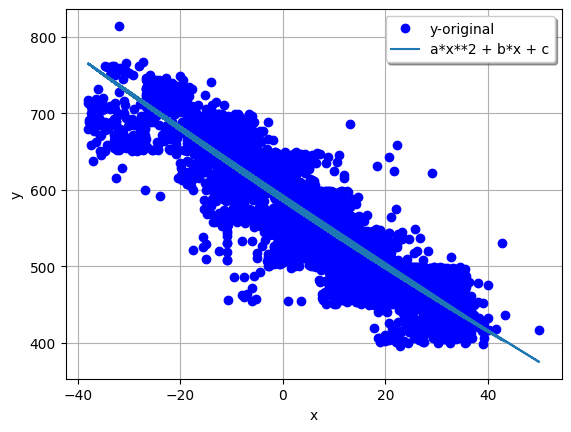

In [357]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [358]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[0] = ['Riesgo', 'Modelo 1', round(R2,2), round(corr,2)]

0.838398578254642
0.9156410750150094


Modelo 2 (Función valor absoluto)

In [359]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['riesgo'] != 0]
df1 = df1[df1['score_buro'] != 0]
Vars_Indep= df1[['riesgo']]
Var_Dep= df1['score_buro']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['riesgo'], df1['score_buro'])

In [360]:
parametros

array([ 1.61142262e-01, -4.48293116e+00,  5.84705415e+02])

In [361]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['riesgo'], df1['score_buro'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 =a*np.abs(x) + b*x + c
yfit1

,riesgo
7243,459.373537
7247,589.349489
7250,416.155649
7254,493.947849
7255,537.165738
...,...
22721,565.473455
22722,466.072310
22727,569.579154
22731,502.591426


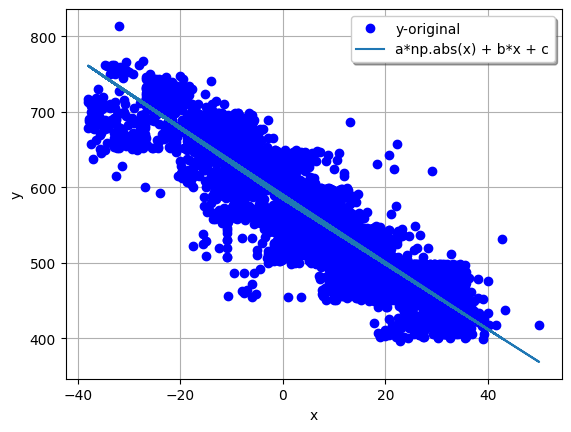

In [362]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.abs(x) + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [363]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[1] = ['Riesgo', 'Modelo 2', round(R2,2), round(corr,2)]

0.83818874607901
0.9155264857332146


Modelo 3 (Función lineal con producto de coeficientes)

In [364]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['riesgo'] != 0]
df1 = df1[df1['score_buro'] != 0]
Vars_Indep= df1[['riesgo']]
Var_Dep= df1['score_buro']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['riesgo'], df1['score_buro'])

In [365]:
parametros

array([143.91432396, -68.2177104 , -68.2177104 ])

In [366]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['riesgo'], df1['score_buro'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x + b*x + c*x
yfit1

,riesgo
7243,216.888192
7247,-7.478903
7250,291.677223
7254,157.056966
7255,82.267935
...,...
22721,33.281119
22722,205.295892
22727,26.176161
22731,142.099160


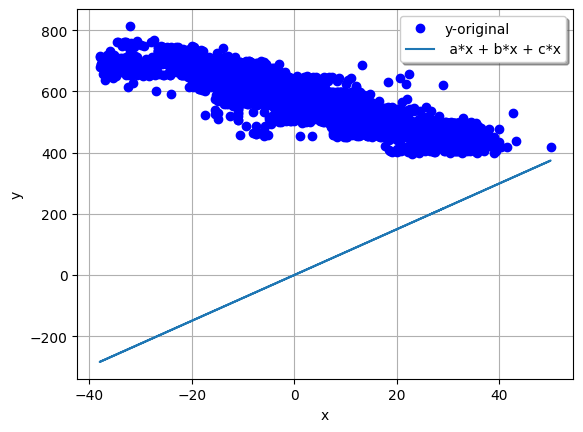

In [367]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label=" a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [368]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[2] = ['Riesgo', 'Modelo 3', round(R2,2), round(corr,2)]

-44.52710230642193
6.672863126606295


Modelo 4 (Función logaritmica)

In [369]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['riesgo'] != 0]
#df1 = df1[df1['score_buro'] != 0]
Vars_Indep= df1[['riesgo']]
Var_Dep= df1['score_buro']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep
def  func1 (x, a):
     return  1/a*x**2
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['riesgo'], df1['score_buro'])

In [370]:
parametros

array([1.36229578])

In [371]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['riesgo'], df1['score_buro'])
a = parametros[ 0 ]
yfit1 =1/a*x**2


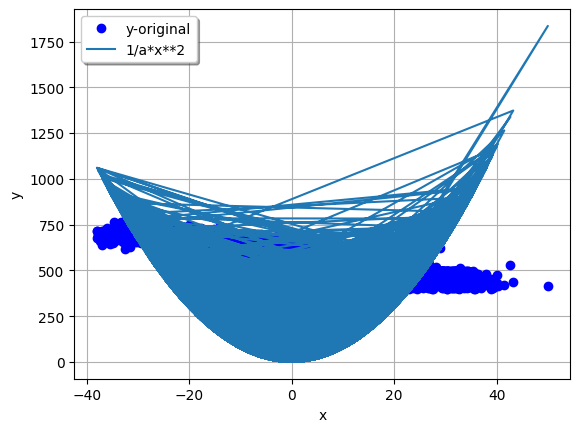

In [372]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="1/a*x**2")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [373]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[3] = ['Riesgo', 'Modelo 4', round(R2,2), round(corr,2)]

-28.500857021268317
5.338619392808249


Modelo 5 (Función inversa)

In [374]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['riesgo'] >= 0]
df1 = df1[df1['score_buro'] != 0]
Vars_Indep= df1[['riesgo']]
Var_Dep= df1['score_buro']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

def  func1 (x, a):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['riesgo'], df1['score_buro'])

In [375]:
parametros

array([0.04746421])

In [376]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['riesgo'], df1['score_buro'])
a = parametros[ 0 ]
yfit1 = 1/a*x
yfit1

,riesgo
7243,610.986709
7250,821.671781
7254,442.438652
7255,231.753579
7256,252.822087
...,...
22721,93.754857
22722,578.330523
22727,73.739775
22731,400.301637


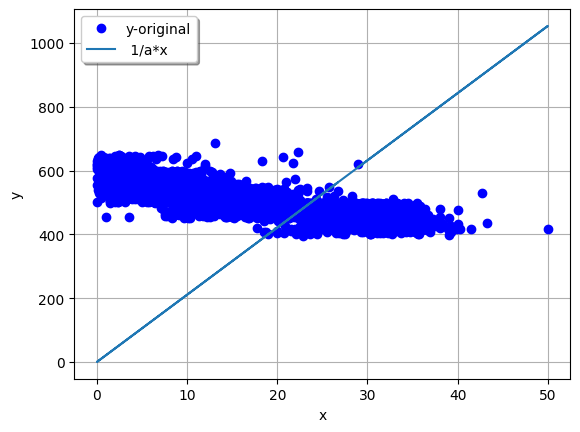

In [377]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label=" 1/a*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [378]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[4] = ['Riesgo', 'Modelo 5', round(R2,2), round(corr,2)]

-37.513874969930974
6.12485713873646


#Variable Independiente 2: score_buro

Modelo 1  (Función cuadratica)

In [379]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['score_buro'] != 0]
df1 = df1[df1['edad_cliente'] != 0]
Vars_Indep= df1[['score_buro']]
Var_Dep= df1['edad_cliente']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['score_buro'], df1['edad_cliente'])

In [380]:
parametros

array([ 2.39904514e-04, -2.68906401e-01,  1.10227925e+02])

In [381]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['score_buro'], df1['edad_cliente'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c
yfit1

,score_buro
7243,35.783362
7247,36.431129
7250,41.127310
7254,35.306548
7255,35.194932
...,...
22721,34.896253
22722,36.465691
22727,36.509391
22731,35.693809


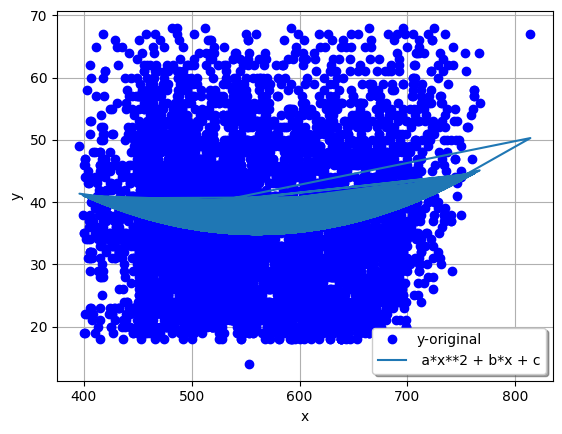

In [382]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label=" a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [383]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[5] = ['Score_buro', 'Modelo 1', round(R2,2), round(corr,2)]

0.020398041964032276
0.14282171390944823


Modelo 2 (Función valor absoluto)

In [384]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['score_buro'] != 0]
df1 = df1[df1['edad_cliente'] != 0]
Vars_Indep= df1[['score_buro']]
Var_Dep= df1['edad_cliente']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['score_buro'], df1['edad_cliente'])

In [385]:
parametros

array([100.00232133, -99.99783607,  33.95221691])

In [386]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['score_buro'], df1['edad_cliente'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c
yfit1

,score_buro
7243,36.742050
7247,36.827270
7250,35.741837
7254,36.275583
7255,36.629919
...,...
22721,36.508816
22722,36.100658
22727,36.836241
22731,36.203819


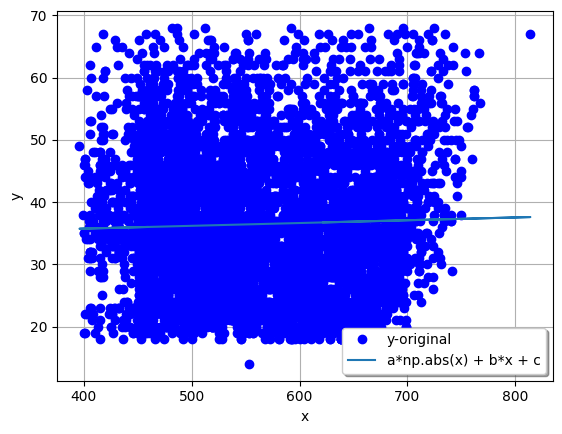

In [387]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.abs(x) + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [388]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[6] = ['score_buro', 'Modelo 2', round(R2,2), round(corr,2)]

0.0010572300642250898
0.0325150744151861


Modelo 3 (Función cociente entre polinomios)

In [389]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['score_buro'] != 0]
df1 = df1[df1['edad_cliente'] != 0]
Vars_Indep= df1[['score_buro']]
Var_Dep= df1['edad_cliente']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['score_buro'], df1['edad_cliente'])

In [390]:
parametros#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['score_buro'], df1['edad_cliente'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a*x**2 + b)/ c*x
yfit1

,score_buro
7243,37.701310
7247,37.582586
7250,31.687335
7254,36.469609
7255,37.688552
...,...
22721,37.467332
22722,35.262022
22727,37.563477
22731,36.019746


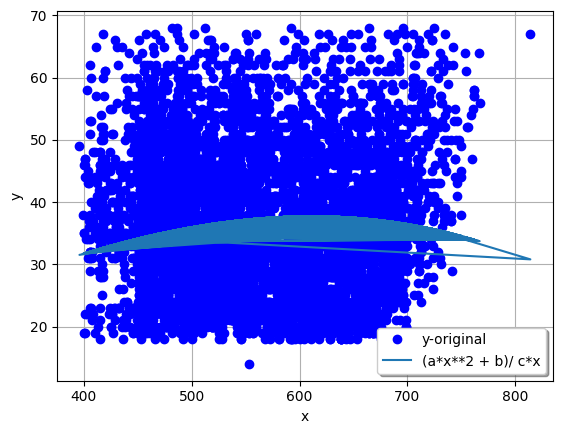

In [391]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="(a*x**2 + b)/ c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [392]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[7] = ['Score_buro', 'Modelo 3', round(R2,2), round(corr,2)]

-0.031817469971832546
0.17837452164429915


Modelo 4 (Función logaritmica)

In [393]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['score_buro'] != 0]
df1 = df1[df1['edad_cliente'] != 0]
Vars_Indep= df1[['score_buro']]
Var_Dep= df1['edad_cliente']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['score_buro'], df1['edad_cliente'])

In [394]:
parametros

array([ 1.80331759, 25.06877839])

In [395]:
parametros#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['score_buro'], df1['edad_cliente'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.log(x) + b
yfit1

,score_buro
7243,36.669412
7247,36.723673
7250,35.868778
7254,36.339469
7255,36.595435
...,...
22721,36.511976
22722,36.198315
22727,36.729291
22731,36.282889


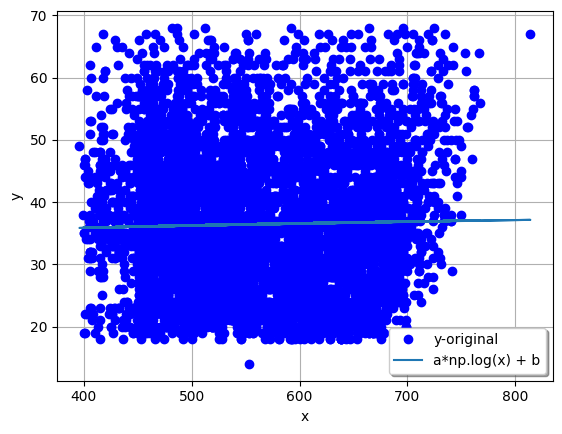

In [396]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.log(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [397]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[8] = ['Score_buro', 'Modelo 4', round(R2,2), round(corr,2)]

0.0005437444711043904
0.023318329080454937


Modelo 5 (Función inversa)

In [398]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['score_buro'] >= 0]
df1 = df1[df1['edad_cliente'] != 0]
Vars_Indep= df1[['score_buro']]
Var_Dep= df1['edad_cliente']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

def  func1 (x, a):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['riesgo'], df1['score_buro'])

In [399]:
parametros

array([0.13370946])

In [400]:
parametros#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['score_buro'], df1['edad_cliente'])
a= parametros[ 0 ]
yfit1 = 1/a*x
yfit1

,score_buro
7243,39.868495
7247,41.086343
7250,25.574806
7254,33.202380
7255,38.266064
...,...
22721,36.535438
22722,30.702587
22727,41.214538
22731,32.176824


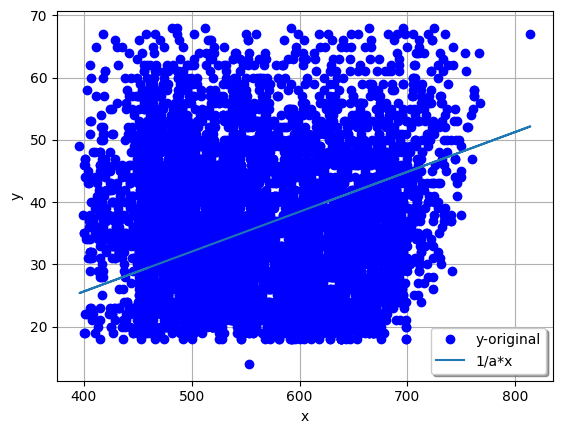

In [401]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="1/a*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [402]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[9] = ['Score_buro', 'Modelo 5', round(R2,2), round(corr,2)]

-0.18964111968208552
0.43547803582050554


#Variable Independiente 3: porc_Eng

Modelo 1 (Función cuadratica)

In [403]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['porc_eng'] != 0]
df1 = df1[df1['enganche'] != 0]
Vars_Indep= df1[['porc_eng']]
Var_Dep= df1['enganche']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['porc_eng'], df1['enganche'])

In [404]:
parametros

array([  -0.32551423,   53.07370548, -173.64598909])

In [405]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['porc_eng'], df1['enganche'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c
yfit1

,porc_eng
7243,964.051960
7247,639.988699
7250,1051.980546
7254,724.965817
7255,648.777877
...,...
22721,976.076062
22722,388.633871
22727,949.750253
22731,1108.410846


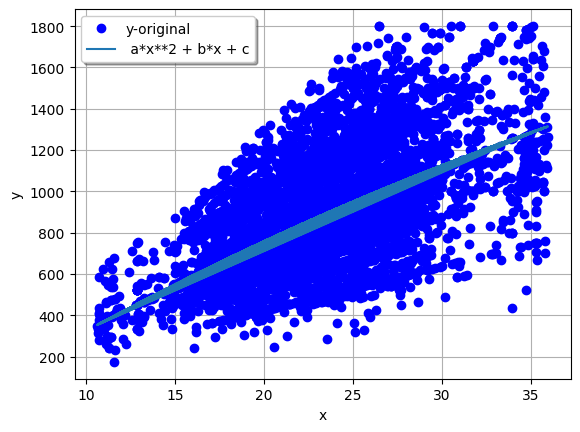

In [406]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label=" a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [407]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[10] = ['Porc_eng', 'Modelo 1', round(R2,2), round(corr,2)]

0.34194904065354703
0.5847640897435025


Modelo 2 (Función valor absoluto)

In [408]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['porc_eng'] != 0]
df1 = df1[df1['enganche'] != 0]
Vars_Indep= df1[['porc_eng']]
Var_Dep= df1['enganche']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['porc_eng'], df1['enganche'])

In [409]:
parametros

array([118.87204894, -81.21605754,   2.31043445])

In [410]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['porc_eng'], df1['enganche'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 =  1/a*x
yfit1

,porc_eng
7243,0.213591
7247,0.144105
7250,0.234286
7254,0.161434
7255,0.145871
...,...
22721,0.216367
22722,0.095817
22727,0.210310
22731,0.248082


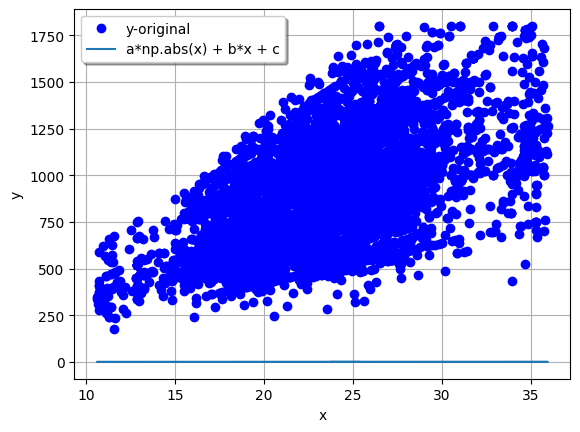

In [411]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.abs(x) + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [412]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[11] = ['Porc_eng', 'Modelo 2', round(R2,2), round(corr,2)]

-9.271611802705133
3.0449321507556015


Modelo 3 (Función cocientre entre polinomios)

In [413]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['porc_eng'] != 0]
df1 = df1[df1['enganche'] != 0]
Vars_Indep= df1[['porc_eng']]
Var_Dep= df1['enganche']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['porc_eng'], df1['enganche'])

In [414]:
parametros

array([-4.41941370e-04,  1.95855636e+01,  5.11209551e-01])

In [415]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['porc_eng'], df1['enganche'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 =(a*x**2 + b)/ c*x
yfit1

,porc_eng
7243,958.596894
7247,651.942540
7250,1048.320656
7254,729.101868
7255,659.826318
...,...
22721,970.680989
22722,435.098551
22727,944.297215
22731,1107.655595


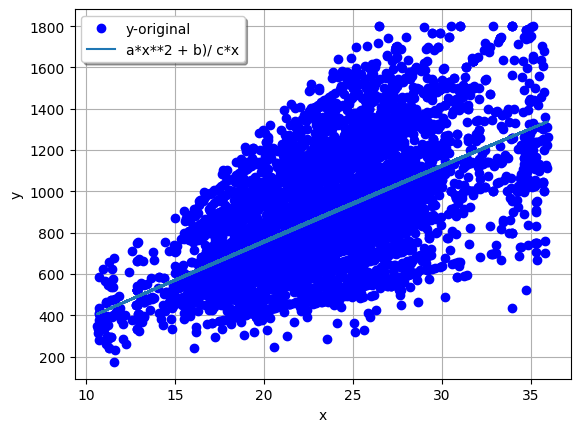

In [416]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x**2 + b)/ c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [417]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[12] = ['Porc_eng', 'Modelo 3', round(R2,2), round(corr,2)]

0.3410521355005921
0.5839966913438741


Modelo 4 (Función logaritmica)

In [418]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['porc_eng'] != 0]
df1 = df1[df1['enganche'] != 0]
Vars_Indep= df1[['porc_eng']]
Var_Dep= df1['enganche']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['porc_eng'], df1['enganche'])

In [419]:
parametros

array([  840.18572405, -1749.16519002])

In [420]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['porc_eng'], df1['enganche'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 =a*np.log(x) + b
yfit1

,porc_eng
7243,968.294040
7247,637.660723
7250,1045.992375
7254,733.070532
7255,647.898100
...,...
22721,979.143781
22722,294.784681
22727,955.288326
22731,1094.066337


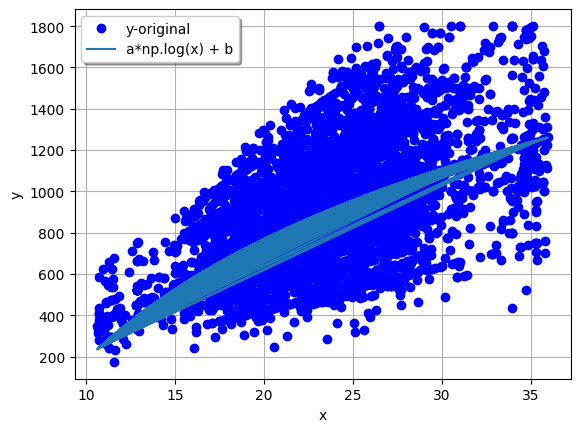

In [421]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.log(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [422]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[13] = ['Porc_eng', 'Modelo 4', round(R2,2), round(corr,2)]

0.33742716173694043
0.5808848093528874


Modelo 5 (Función Inversa)

In [423]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['porc_eng'] != 0]
df1 = df1[df1['enganche'] != 0]
Vars_Indep= df1[['porc_eng']]
Var_Dep= df1['enganche']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep
def  func1 (x, a):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['porc_eng'], df1['enganche'])

In [424]:
parametros

array([0.02648919])

In [425]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['porc_eng'], df1['enganche'])
a=parametros[ 0 ]
yfit1 = 1/a*x
yfit1

,porc_eng
7243,958.504131
7247,646.678841
7250,1051.372196
7254,724.446407
7255,654.606602
...,...
22721,970.962042
22722,429.986690
22727,943.781145
22731,1113.284239


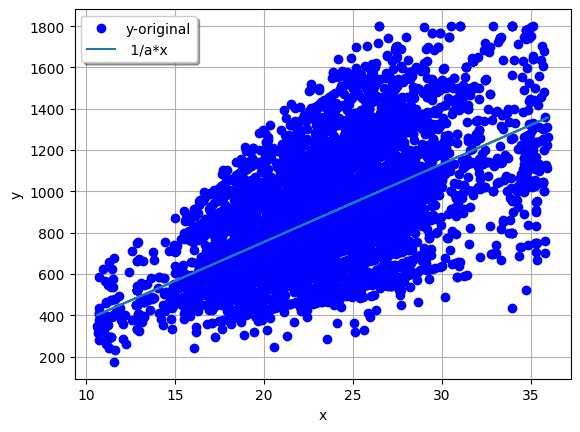

In [426]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label=" 1/a*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [427]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[14] = ['Porc_eng', 'Modelo 5', round(R2,2), round(corr,2)]

0.34078523242179104
0.5837681324137102


#Variable Independiente 4: limite_credito

Modelo 1  (Función cuadratica)

In [428]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['limite_credito'] != 0]
df1 = df1[df1['porc_eng'] != 0]
Vars_Indep= df1[['limite_credito']]
Var_Dep= df1['porc_eng']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['limite_credito'], df1['porc_eng'])

In [429]:
parametros

array([ 1.14074100e-07, -3.68122466e-03,  3.93153272e+01])

In [430]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['limite_credito'], df1['porc_eng'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c
yfit1

,limite_credito
7243,29.298320
7247,21.334647
7250,30.054645
7254,26.415614
7255,23.761056
...,...
22721,22.519333
22722,13.910491
22727,21.334647
22731,23.761056


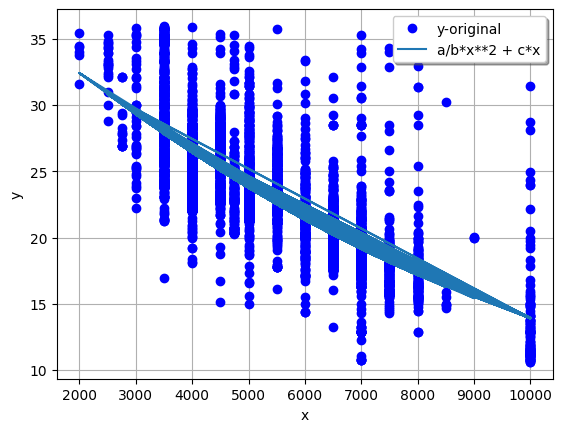

In [431]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a/b*x**2 + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [432]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[15] = ['Limite_credito', 'Modelo 1', round(R2,2), round(corr,2)]

0.605065659546776
0.7778596657153372


Modelo 2 (Función valor absoluto)

In [433]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['limite_credito'] != 0]
df1 = df1[df1['porc_eng'] != 0]
Vars_Indep= df1[['limite_credito']]
Var_Dep= df1['porc_eng']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['limite_credito'], df1['porc_eng'])

In [434]:
parametros

array([ 100.00488229, -100.00722971,   35.70836256])

In [435]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['limite_credito'], df1['porc_eng'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c
yfit1

,limite_credito
7243,28.666107
7247,21.623851
7250,29.252962
7254,26.318688
7255,23.971270
...,...
22721,22.797561
22722,12.234177
22727,21.623851
22731,23.971270


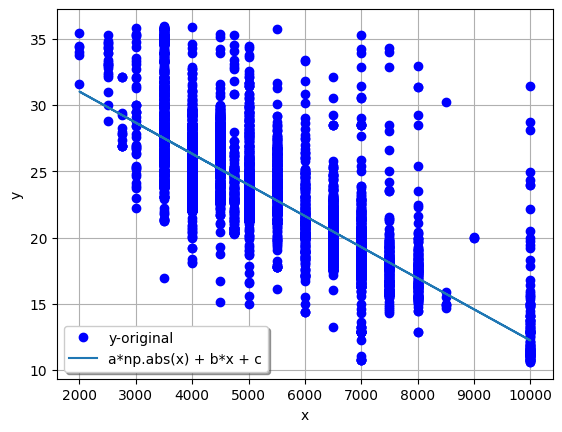

In [436]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.abs(x) + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [437]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[16] = ['Limite_credito', 'Modelo 2', round(R2,2), round(corr,2)]

0.5998489596750914
0.7744991669944464


Modelo 3 (Función cocientre entre polinomio)

In [438]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['limite_credito'] != 0]
df1 = df1[df1['porc_eng'] != 0]
Vars_Indep= df1[['limite_credito']]
Var_Dep= df1['porc_eng']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['limite_credito'], df1['porc_eng'])

In [439]:
parametros

array([-1.19281783e-09,  1.14155328e-01,  1.67658591e+01])

In [440]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['limite_credito'], df1['porc_eng'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a*x**2 + b)/ c*x
yfit1

,limite_credito
7243,18.505458
7247,25.485322
7250,17.244584
7254,22.681866
7255,25.150779
...,...
22721,25.611526
22722,-3.057675
22727,25.485322
22731,25.150779


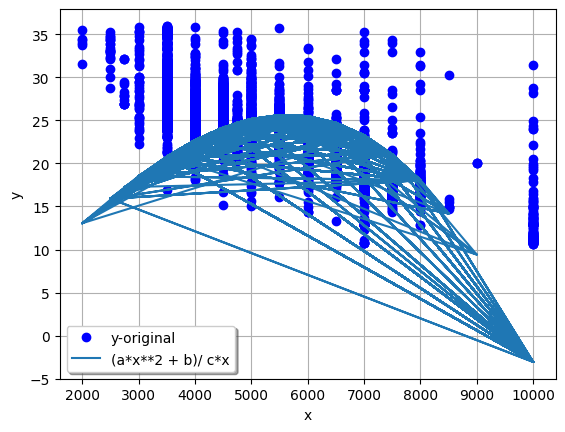

In [441]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="(a*x**2 + b)/ c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [442]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[17] = ['Limite_credito', 'Modelo 3', round(R2,2), round(corr,2)]

-0.5108634769823528
0.714747141989636


Modelo 4 (Función logaritmica

In [443]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['limite_credito'] != 0]
df1 = df1[df1['porc_eng'] != 0]
Vars_Indep= df1[['limite_credito']]
Var_Dep= df1['porc_eng']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['limite_credito'], df1['porc_eng'])

In [444]:
parametros

array([-12.81980892, 132.71399747])

In [445]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['limite_credito'], df1['porc_eng'])
a, b= parametros[ 0 ], parametros[ 1 ]
yfit1 =  a*np.log(x) + b
yfit1

,limite_credito
7243,30.073895
7247,21.187881
7250,31.189364
7254,26.385866
7255,23.525208
...,...
22721,22.303350
22722,14.639194
22727,21.187881
22731,23.525208


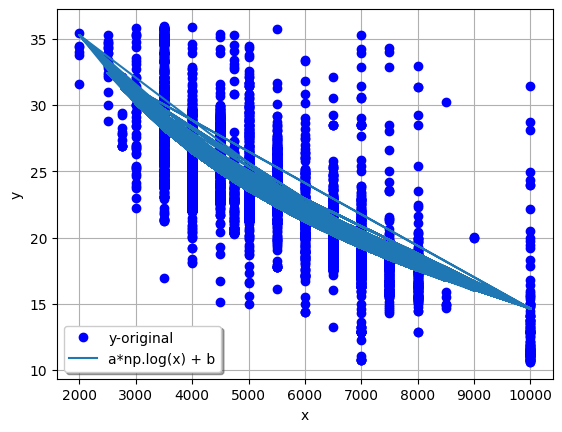

In [446]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.log(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [447]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[18] = ['Limite_credito', 'Modelo 4', round(R2,2), round(corr,2)]

0.6038276477382366
0.7770634772901353


Modelo 5 (Función inversa)

In [448]:
#Declaración de  variables dependientes e independientes para la regresión No lineal
df1 = df[df['limite_credito'] != 0]
df1 = df1[df1['porc_eng'] != 0]
Vars_Indep= df1[['limite_credito']]
Var_Dep= df1['porc_eng']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

def  func1 (x, a):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['limite_credito'], df1['porc_eng'])

In [449]:
parametros

array([252.87365081])

In [450]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['limite_credito'], df1['porc_eng'])
a = parametros[ 0 ]
yfit1 = 1/a*x
yfit1

,limite_credito
7243,11.863632
7247,23.727265
7250,10.874996
7254,15.818176
7255,19.772720
...,...
22721,21.749992
22722,39.545441
22727,23.727265
22731,19.772720


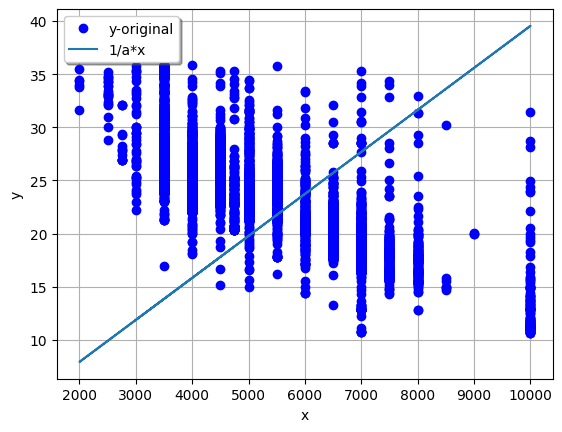

In [451]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="1/a*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [452]:
R2 = r2_score(y, yfit1)
print(R2)
corr= np.sqrt(abs(R2))
print(corr)
coeficientes.loc[19] = ['Limite_credito', 'Modelo 5', round(R2,2), round(corr,2)]

-4.068863114184372
2.017142313815357


#Tabla de coeficientes

In [453]:
coeficientes

,Variable,Modelo,Determinación,Correlación
0,Riesgo,Modelo 1,0.84,0.92
1,Riesgo,Modelo 2,0.84,0.92
2,Riesgo,Modelo 3,-44.53,6.67
3,Riesgo,Modelo 4,-28.50,5.34
4,Riesgo,Modelo 5,-37.51,6.12
5,Score_buro,Modelo 1,0.02,0.14
6,score_buro,Modelo 2,0.00,0.03
7,Score_buro,Modelo 3,-0.03,0.18
8,Score_buro,Modelo 4,0.00,0.02
9,Score_buro,Modelo 5,-0.19,0.44
